# Regression

In this exercise, we will be using the Auto (`Auto.csv`) data set. This data set contains 397 different car observations.\
The variables are:

| Variable         | Description                                                  |
|------------------|--------------------------------------------------------------|
| **mpg**          | Miles per gallon                                             |
| **cylinders**    | Number of cylinder for this car                              |
| **displacement** | Engine displacement (in cubic inches)                        |
| **horsepower**   | Horsepower of car                                            |
| **weight**       | Weight of car (pound)                                        |
| **acceleration** | Time to accelerate from 0 to 60 (in secs)                    |
| **year**         | Model year (1900s)                                           |
| **origin**       | Country of origin (1 = American, 2 = European, 3 = Japanese) |
| **name**         | Car name                                                     |

In [1]:
#load necessary packages
import pandas as pd
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
#load in the dataset
df = pd.read_csv("Auto.csv", na_values="?")
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
#notice that origin is actually a categorical variable denoted using integers, not a numeric variable in substance
#notice that year can be both a measure of time, or an categorical variable describing the version of an automobile

df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [4]:
df["origin"] = df["origin"].astype("object")
df["year"] = df["year"].astype("object")

df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year             object
origin           object
name             object
dtype: object

In [5]:
#remove observations with missing values
df = df[~df.isna().any(axis=1)]
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


======================================================================

#### ❓Q1. Using the `statsmodels` package, create a regression model (`model1`) by considering `mpg` as the response and `horsepower` as the predictor. Execute `model1.summary()` to get the results of the model. Comment on the model & include the equation of the model.

In [6]:
#TODO
y = df["mpg"]
y


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64

In [7]:
X = df["horsepower"]
X


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 392, dtype: float64

In [8]:
X = sm.add_constant(X)
X

#y = B0*(1) + B1*X


,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
392,1.0,86.0
393,1.0,52.0
394,1.0,84.0
395,1.0,79.0


In [9]:
# OLS = Ordinary Least Squares
model1 = sm.OLS(y, X).fit()


In [10]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           7.03e-81
Time:                        15:48:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#y = 39.9359*(1) - 0.1578*horsepower


======================================================================

#### ❓Q2. Generate the scatter plot of `mpg` against `horsepower`. Embed the regression line onto the scatter plot.

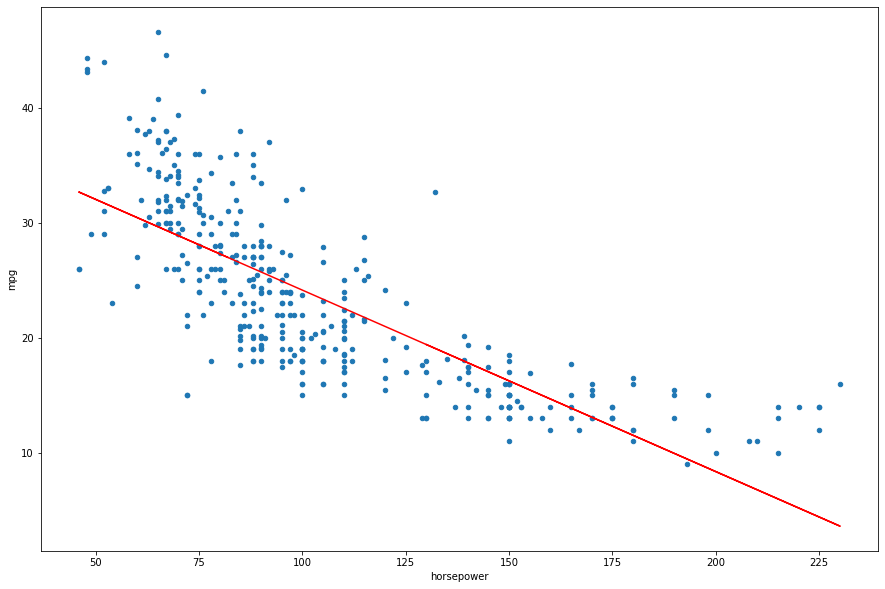

In [12]:
#TODO
df.plot.scatter(x="horsepower", y="mpg", figsize=(15,10))
plt.plot(df.horsepower, model1.fittedvalues, color="r")
plt.show()


======================================================================

In [13]:
#fitted values are predictions of each data point in the training set
model1.predict(X) == model1.fittedvalues


0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
394    True
395    True
396    True
Length: 392, dtype: bool

In [14]:
#this is the residual value (i.e. y - predicted_y)
model1.resid


0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64

In [15]:
y - model1.predict(X)


0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64

======================================================================

#### ❓Q3. Generate `model2` that consider all the numerical predictors against `mpg` (response). Execute `model2.summary()` to get the results of the model. What can we say about `model2`?

In [16]:
#TODO
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [17]:
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year             object
origin           object
name             object
dtype: object

In [18]:
X2 = df.iloc[:, 1:6]
X2 = sm.add_constant(X2)
X2


,const,cylinders,displacement,horsepower,weight,acceleration
0,1.0,8,307.0,130.0,3504,12.0
1,1.0,8,350.0,165.0,3693,11.5
2,1.0,8,318.0,150.0,3436,11.0
3,1.0,8,304.0,150.0,3433,12.0
4,1.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
392,1.0,4,140.0,86.0,2790,15.6
393,1.0,4,97.0,52.0,2130,24.6
394,1.0,4,135.0,84.0,2295,11.6
395,1.0,4,120.0,79.0,2625,18.6


In [19]:
model2 = sm.OLS(y, X2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          9.82e-101
Time:                        15:56:01   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#TODO
# R2 value is higher than model1
# not all the predictors are useful (e.g. cylinder, displacement, acceleration)


======================================================================

# Evaluation

#### ❓Q4. use `train_test_split()` to divide the dataset into 70% training and 30% testing datasets (set `random_test=123` to ensure that we can replicate the splits).

In [21]:
#TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=123)


In [22]:
lin_model = sm.OLS(y_train, X_train).fit()
lin_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           4.49e-69
Time:                        15:56:09   Log-Likelihood:                -786.70
No. Observations:                 274   AIC:                             1585.
Df Residuals:                     268   BIC:                             1607.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.3413      3.276     13.230      0.000      36.891      49.791
cylinders       -0.0854      0.506     -0.169      0.866      -1.082       0.911
displacement    -0.0156      0.012     -1.345      0.180      -0.038       0.007
horsepower      -0.0246      0.021     -1.155      0.249      -0.067       0.017
weight          -0.0048      0.001     -4.417      0.000      -0.007      -0.003
acceleration     0.0258      0.157      0.164      0.870      -0.283       0.334
==============================================================================
Omnibus:                       21.249   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.220
Skew:                           0.596   Prob(JB):                     2.02e-06
Kurtosis:                       3.935   Cond. No.                     3.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ❓Q5. Evaluate the performance of Linear Regression learning method using the training/testing dataset from the previous question.

In [23]:
#TODO
from sklearn.metrics import mean_squared_error
y_pred_linR = lin_model.predict(X_test)


In [24]:
MSE = mean_squared_error(y_test, y_pred_linR)
MSE


17.22359669995135

In [25]:
RMSE = ma.sqrt(MSE)
RMSE


4.150132130420832

======================================================================

# Classification

## Logistic Regression

In [26]:
import pandas as pd
import numpy as np
import math as ma
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt


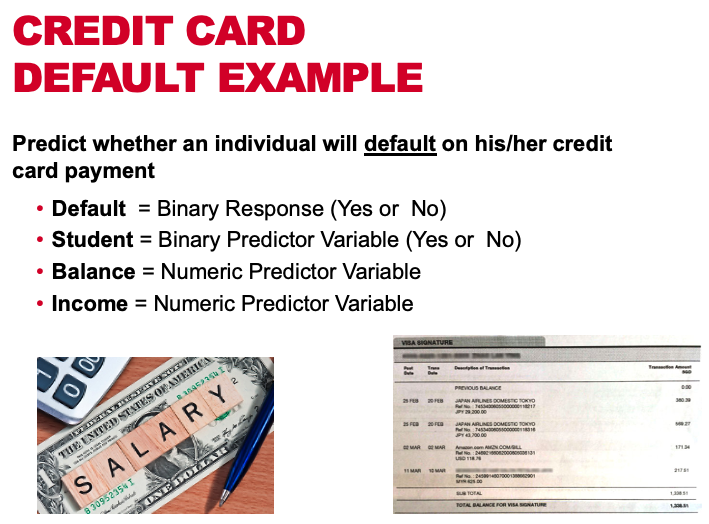

In [27]:
df = pd.read_csv("default.csv")
df


,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


In [28]:
# Dummy variables
df["studentYes"] = pd.factorize(df.student)[0].astype("float64")
df["defaultYes"] = pd.factorize(df.default)[0].astype("float64")
df.dtypes


default        object
student        object
balance       float64
income        float64
studentYes    float64
defaultYes    float64
dtype: object

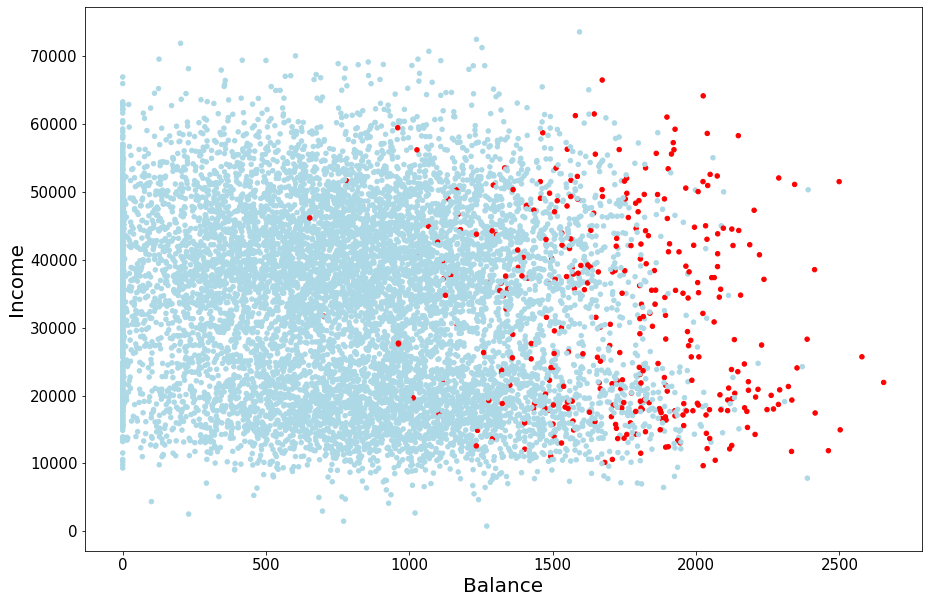

In [29]:
# Assign Color based on Class
colors = []
for i in range(len(df)):
    if (df.iloc[i,0] == "No"):
        colors.append("lightblue")
    else:
        colors.append("r")

df.plot.scatter(x="balance", y="income", c=colors, figsize=(15,10), fontsize=15)
plt.xlabel('Balance', fontsize=20)
plt.ylabel('Income', fontsize=20)
plt.show()


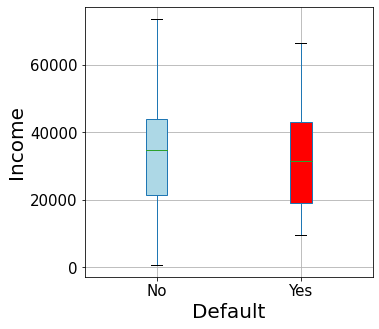

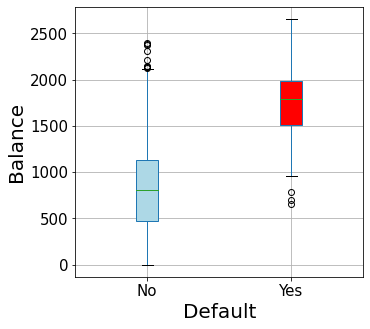

In [30]:
default_color = ["lightblue", "red"]

# Income vs. Default
bp_dict = df[["income", "default"]].boxplot(by="default", fontsize=15, figsize=(5,5), 
                                            return_type='both', patch_artist=True)
plt.xlabel('Default', fontsize=20)
plt.ylabel('Income', fontsize=20)
plt.title("")
plt.suptitle("")

#change the color of the boxplots
for row_key, (ax, row) in bp_dict.iteritems():
    for i,box in enumerate(row["boxes"]):
        box.set_facecolor(default_color[i])

# Balance vs. Default
bp_dict = df[["balance", "default"]].boxplot(by="default", fontsize=15, figsize=(5,5),
                                             return_type='both', patch_artist=True)
plt.xlabel('Default', fontsize=20)
plt.ylabel('Balance', fontsize=20)
plt.title("")
plt.suptitle("")

#change the color of the boxplots
for row_key, (ax, row) in bp_dict.iteritems():
    for i,box in enumerate(row["boxes"]):
        box.set_facecolor(default_color[i])
        

======================================================================

### Choosing the Predictor and the Response

In [31]:
#Set Predictor and Response
X = df[["balance"]]
y = df["defaultYes"]


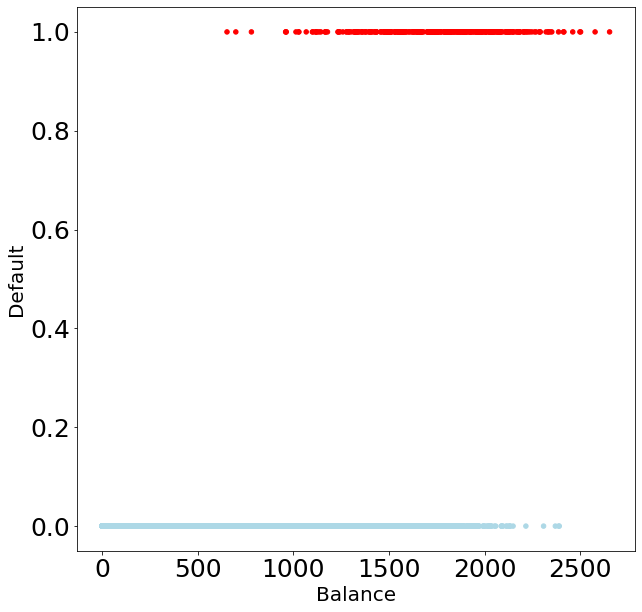

In [32]:
df.plot.scatter(x="balance", y="defaultYes", c=colors, figsize=(10,10), fontsize=25)
plt.xlabel('Balance', fontsize=20)
plt.ylabel('Default', fontsize=20)
plt.show()


======================================================================

### If we were to use Linear Regression...

InvalidIndexError: (slice(None, None, None), None)

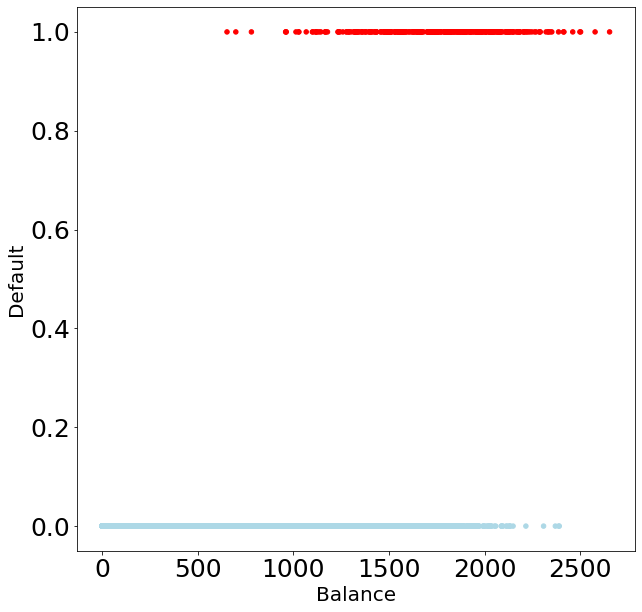

In [33]:
LinR = LinearRegression().fit(X,y)
LinPred = LinR.predict(X)

df.plot.scatter(x="balance", y="defaultYes", c=colors, figsize=(10,10), fontsize=25)
plt.xlabel('Balance', fontsize=20)
plt.ylabel('Default', fontsize=20)

plt.plot(X, LinPred, c="black")
plt.show()


======================================================================

### If we were to use Logistic Regression...

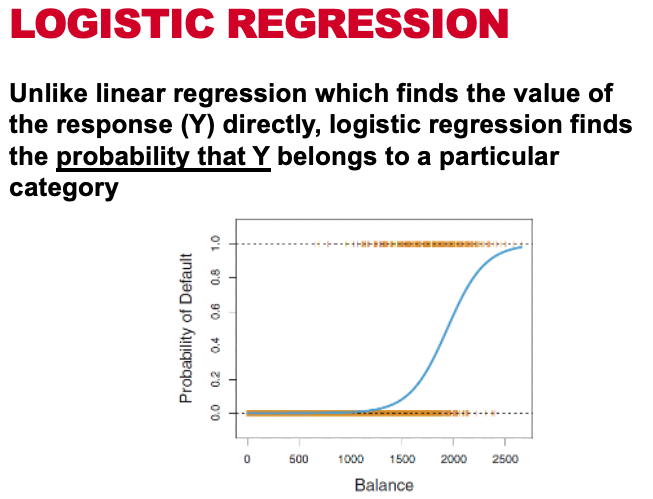

#### ❓Q6. Using the `sklearn` package, create a regression model (`model3`) by considering `defaultYes` as the response and `balance` as the predictor. Embed the probability predictions onto the scatter plot.

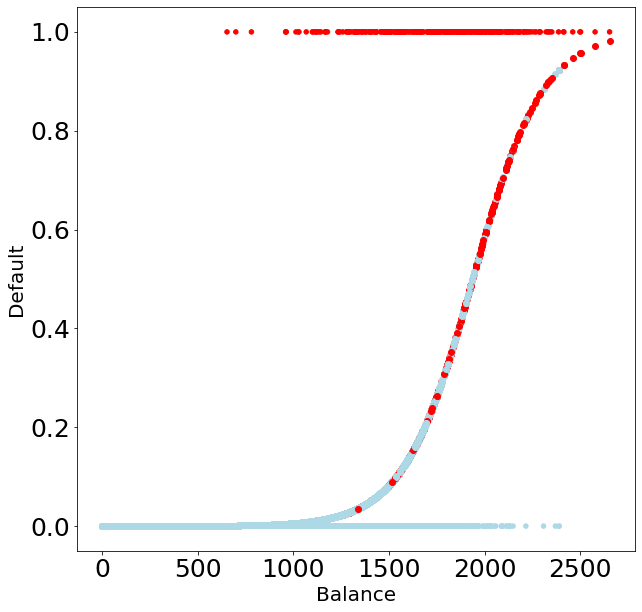

In [34]:
#TODO
model3 = LogisticRegression().fit(X,y)
LogPred = model3.predict_proba(X)

df.plot.scatter(x="balance", y="defaultYes", c=colors, figsize=(10,10), fontsize=25)
plt.xlabel('Balance', fontsize=20)
plt.ylabel('Default', fontsize=20)

for i in range(len(df)):
    plt.plot(X.iloc[i, 0], LogPred[i, 1], "o", color=colors[i])

plt.show()


In [35]:
# Accuracy
model3.score(X,y)


0.9725

In [36]:
# Probabilities Calculated
LogPred


array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

In [37]:
# Probabilities of Being Class 0
LogPred[:, 0]


array([0.99869432, 0.9978874 , 0.99140525, ..., 0.99753348, 0.88324037,
       0.99992855])

In [38]:
# Probabilities of Being Class 1
LogPred[:, 1]


array([1.30568146e-03, 2.11259754e-03, 8.59474814e-03, ...,
       2.46651596e-03, 1.16759635e-01, 7.14476480e-05])

In [39]:
# Sum of Probabilities
LogPred[:, 0] + LogPred[:, 1]


array([1., 1., 1., ..., 1., 1., 1.])

======================================================================

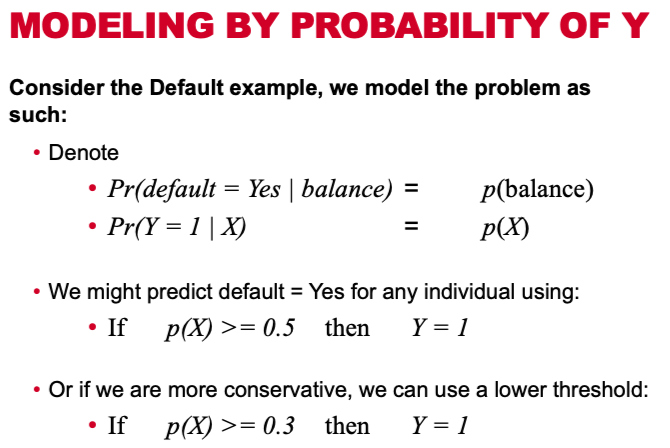

#### ❓Q7. Get the predictions based on a threshold of `0.5` and `0.3`.

In [40]:
#TODO
#Predictions based on threshold = 0.5
model3.predict(X)


array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
#Number of True Predictions (threshold = 0.5)
model3.predict(X).sum()


142.0

In [42]:
#Predictions based on threshold = 0.5
pred_05 = []

for prob in LogPred[:, 1]:
    cls = 0
    if prob >= 0.5:
        cls = 1
    
    pred_05.append(cls)

model3.predict(X) == pred_05


array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
#Number of True Predictions (threshold = 0.5)
sum(pred_05)


142

In [44]:
#Predictions based on threshold = 0.3
pred_03 = []

for prob in LogPred[:, 1]:
    cls = 0
    if prob >= 0.1:
        cls = 1
    
    pred_03.append(cls)
 

In [45]:
#Number of True Predictions (threshold = 0.3)
sum(pred_03)


794

======================================================================

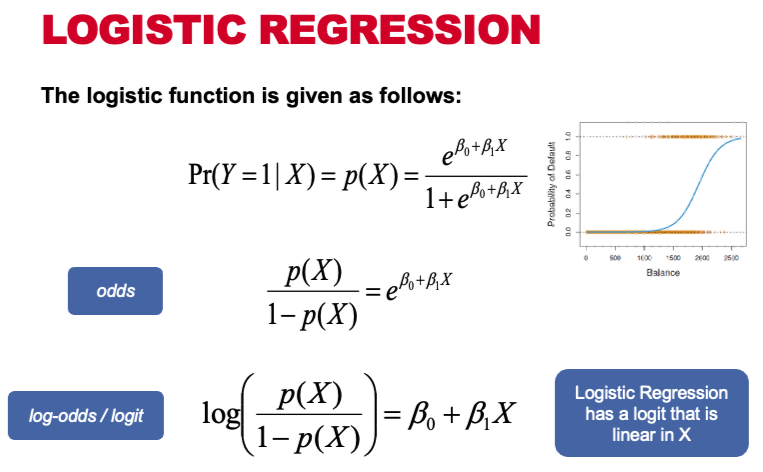

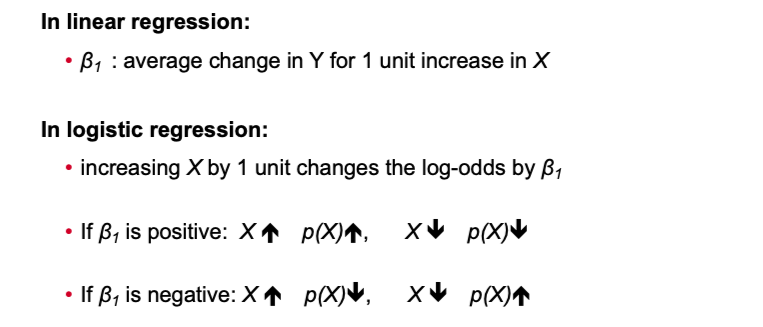

======================================================================

## Calculating Predicted Probabilities Manually

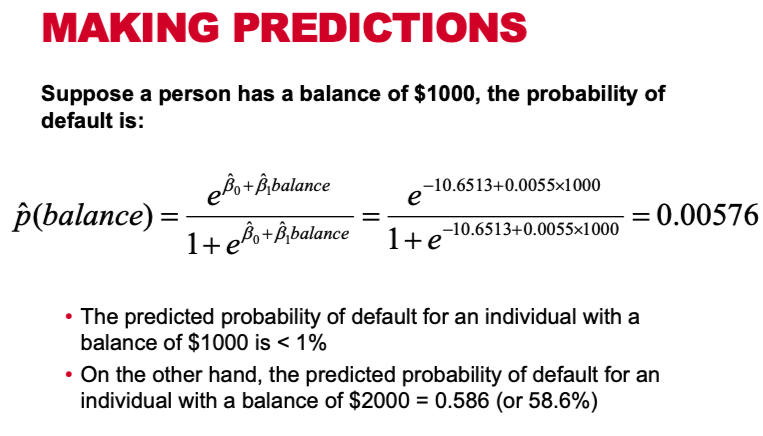

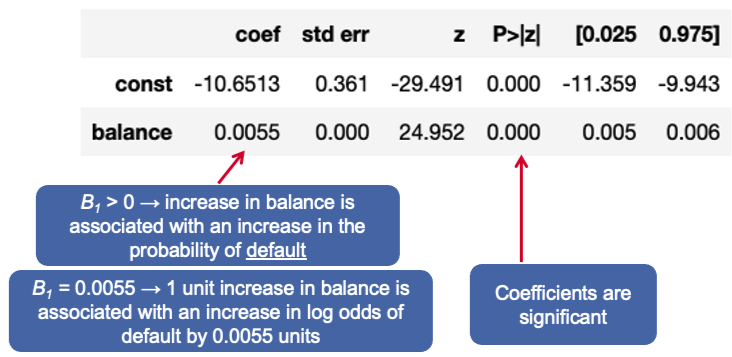

#### ❓Q8. Calculate the probabilities of `default` given `balance` values of `1000` and `2000`.

In [46]:
#TODO
#to get the intercept
model3.intercept_


array([-10.65132824])

In [47]:
#to get the coefficient estimates
model3.coef_


array([[0.00549892]])

In [48]:
#calculate probability
# a = Pr(default=1 | balance=1000)

a = ma.e ** (model3.intercept_ + model3.coef_ * 1000)
prob_1000 = a / (1 + a)
prob_1000 


array([[0.00575215]])

In [49]:
#calculate probability
# b = Pr(default=1 | balance=2000)

b = ma.e ** (model3.intercept_ + model3.coef_ * 2000)
prob_2000 = b / (1 + b)
prob_2000 


array([[0.58576927]])

======================================================================

## Using Qualitative (Categorical) Predictors

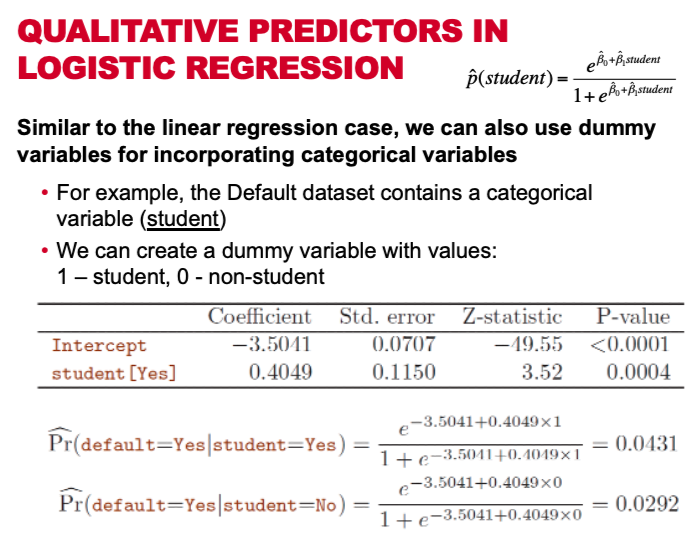

======================================================================

## Multiple Logistic Regression

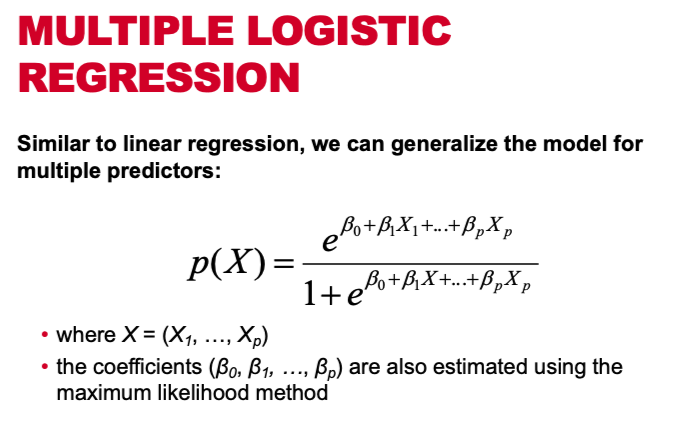

#### ❓Q9. Generate `model4` that consider all the predictors against `defaultYes` (response).

In [50]:
#TODO
#set Predictors and Response
X2 = df[["balance", "income", "studentYes"]]
y = df["defaultYes"]


In [51]:
X2


,balance,income,studentYes
0,729.526495,44361.62507,0.0
1,817.180407,12106.13470,1.0
2,1073.549164,31767.13895,0.0
3,529.250605,35704.49394,0.0
4,785.655883,38463.49588,0.0
...,...,...,...
9995,711.555020,52992.37891,0.0
9996,757.962918,19660.72177,0.0
9997,845.411989,58636.15698,0.0
9998,1569.009053,36669.11236,0.0


In [52]:
#generate model
model4 = LogisticRegression().fit(X2,y)


In [53]:
#to get the intercept
model4.intercept_


array([-2.9508496])

In [54]:
#to get the coefficient estimates
model4.coef_


array([[ 4.08201022e-03, -1.33893466e-04, -3.89009045e+00]])

======================================================================

# Evaluation

#### ❓Q10. use `train_test_split()` to divide the dataset into 70% training and 30% testing datasets (set `random_test=123` to ensure that we can replicate the splits).

In [55]:
#TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=123)


In [56]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [57]:
log_model.intercept_


array([-10.4912143])

In [58]:
log_model.coef_


array([[ 5.54003859e-03,  1.95046688e-06, -6.86414066e-01]])

======================================================================

#### ❓Q11. Evaluate the performance of the Logistic Regression learning method using the training/testing dataset from the previous question.

In [59]:
#TODO
y_pred_logR = log_model.predict(X_test)
y_pred_logR


array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_logR)


0.9726666666666667

======================================================================

#### ❓Q12. Suppose now we perform 10-fold Cross-Validation, does the result in the previous question change?

In [61]:
#TODO
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression(max_iter=10000)
scores_logR = cross_val_score(log_model, X2, y, cv=10)
scores_logR


array([0.965, 0.967, 0.967, 0.969, 0.968, 0.97 , 0.969, 0.966, 0.968,
       0.965])

In [62]:
scores_logR.mean()


0.9673999999999999

In [63]:
scores_logR.std()


0.0016248076809271934

======================================================================

#### ❓Q13. As the data is unbalanced, it might be good to generate the confusion matrix (for Q11). Research on what a confusion matrix is and how to do it on sklearn

In [64]:
#TODO
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred_logR)


array([[2892,   10],
       [  72,   26]], dtype=int64)

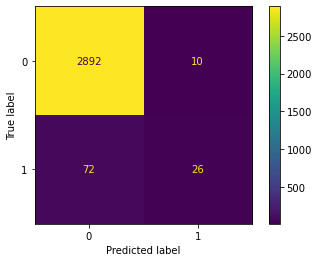

In [65]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logR)).plot()


In [66]:
(2892+26)/(2892+10+72+26)


0.9726666666666667

======================================================================